In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import randint
import statsmodels.api as sm

In [2]:
def DealMissingData(X, dfX):
    ''' deal with missing data
        X: data, type(numpy array)
        dfX: same as X data, type(pandas array) '''
    
    print("----------- Start deal missing data -----------")
    TFarr = np.array(dfX.isna().any())
    for index, ele in enumerate(TFarr):
        if ele:
            if isinstance(X[0][index], str):
                # deal with string data
                imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
                imputer.fit(X[:, [index]])
                X[:, [index]] = imputer.transform(X[:, [index]])
            else:
                # deal with digital data
                imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
                imputer.fit(X[:, [index]])
                X[:, [index]] = imputer.transform(X[:, [index]])
            print(f"{index} column have missing data, fixed!")
        else:
            print(f"{index} column not have missing data")
            
    print("----------- End deal missing data! -----------")
    return X

In [3]:
def MakeOneHot(X, pos={}):
    ''' make one-hot  
        X: data, type(numpy array)
        pos: where need to onehot, type(dictionary) '''
    
    print("----------- Start onehot -----------")
    FeaturesNum = len(X[0])    # init
    for key in pos:
        print(f"{FeaturesNum-pos[key]} column need to one-hot, fixed!")
        ct = ColumnTransformer([(key, OneHotEncoder(), [FeaturesNum-pos[key]])], remainder='passthrough')
        NewX = ct.fit_transform(X)
        X = NewX[:, 1:]
        FeaturesNum = len(X[0])
    
    #print(FeaturesNum)
    #print(X[0])
    print("----------- End onehot -----------")
    return X


In [4]:
def NormalizeData(data_train, data_test):
    ''' normalize data
        data_train: training data, type(numpy array)
        data_test: testing data, type(numpy array) '''
    
    print("----------- Start normalize -----------")
    sc = StandardScaler()
    data_train = sc_X.fit_transform(data_train)
    data_test = sc_X.transform(data_test)
    
    print("----------- End normalize -----------")
    return data_train, data_test

In [5]:
def DrawRelationship(X, y, label_x, label_y , ispred=False, pred=None):
    for key in label_x:
        allarr = []
        for i in range(len(X)):
            allarr.append(X[i][label_x[key]])
        
        if ispred:
            plt.scatter(allarr, pred, c="blue")
        plt.scatter(allarr, y, c="red")
        plt.xlabel(key)
        plt.ylabel(label_y)
        plt.show() 

In [18]:
def DrawPredict(gt, pred, title, text=""):
    ''' data [[groundTruth, predict], [], ....]'''
    
    data = []
    for i in range(len(gt)):
        data.append([gt[i], pred[i]])
        
    data.sort(key=lambda x:x[0])
    for index, ele in enumerate(data):
        plt.scatter(index, data[index][1], c="blue", s=0.7)
        plt.scatter(index, data[index][0], c="red", s=0.7)
    plt.xlabel("dataNums")
    plt.ylabel("charges")
    plt.title(title)
    plt.show() 

In [19]:
def TrainAndTestModel(model, X_train, y_train, X_test, y_test, title):
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    train_acc = model.score(X_train, y_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    DrawPredict(y_train, train_pred, title+"_Train" + "\n" + f"RMSE: {train_rmse}, ACC: {train_acc}")
    
    test_pred = model.predict(X_test)
    test_acc = model.score(X_test, y_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    DrawPredict(y_test, test_pred, title+"_Test" + "\n" + f"RMSE: {test_rmse}, ACC: {test_acc}")

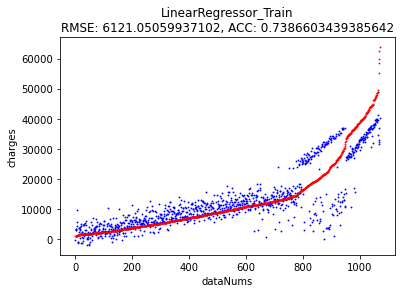

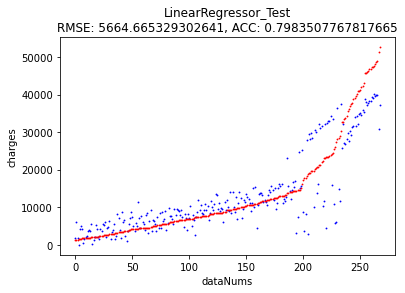

In [20]:
TrainAndTestModel(LinearRegression(), X_train, y_train, X_test, y_test, "LinearRegressor")

<h1>Data preprocessing</h1>

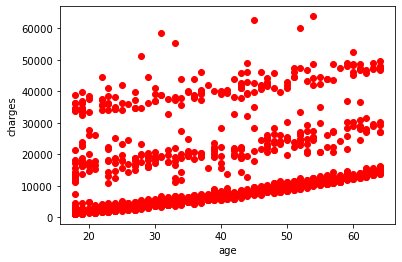

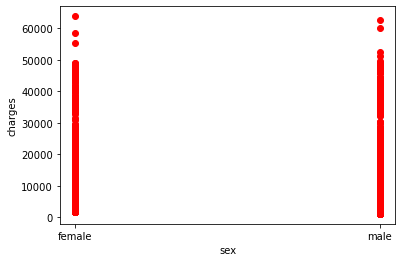

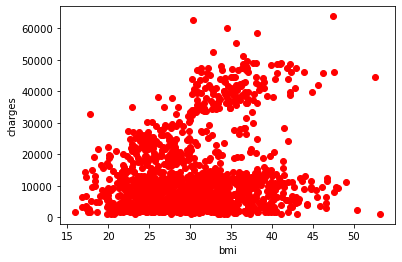

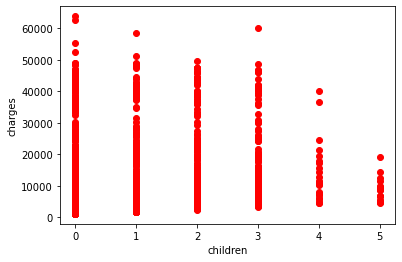

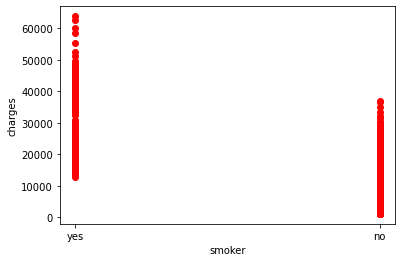

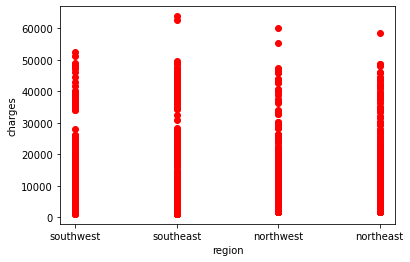

----------- Start deal missing data -----------
0 column not have missing data
1 column not have missing data
2 column not have missing data
3 column not have missing data
4 column not have missing data
5 column not have missing data
----------- End deal missing data! -----------
----------- Start onehot -----------
1 column need to one-hot, fixed!
3 column need to one-hot, fixed!
8 column need to one-hot, fixed!
9 column need to one-hot, fixed!
----------- End onehot -----------
Preprocessing data done!


In [8]:
df = pd.read_csv("./DATA/final_project_dataset_1.csv")

dfX = df.iloc[:, :-1]
X = dfX.values
y = df.iloc[:, -1].values
DrawRelationship(X, y, label_x={'age': 0, 'sex': 1, 'bmi': 2, 'children': 3, 'smoker': 4, 'region': 5}, label_y='charges')

X = DealMissingData(X, dfX)

pos2onehot = {'Sex': 5, 'children': 3, 'Smoker': 2, 'Region': 1}
X = MakeOneHot(X, pos2onehot)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# X_train, X_test = NormalizeData(X_train, X_test)

print("Preprocessing data done!")

<h1>LinearRegressor</h1>

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [9]:
Linear_pred = lin_reg.predict(X_test)
Linear_acc = lin_reg.score(X_test, y_test)

In [10]:
print(Linear_pred[:5])
print(Linear_acc)

[11135.73804883  9446.44007899 38866.31389769 16130.19841251
  6829.59464758]
0.7983507767817665


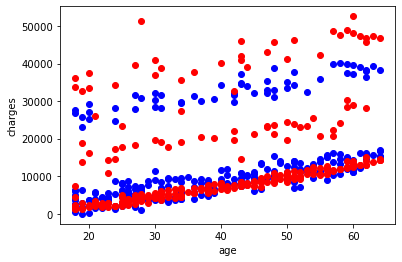

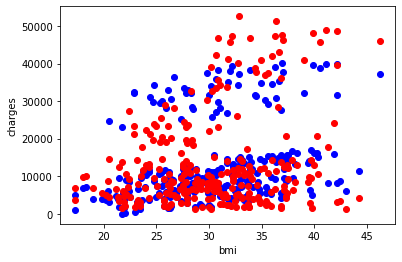

In [11]:
DrawRelationship(X_test, y_test, label_x={'age': -2, 'bmi': -1}, label_y='charges', ispred=True, pred=Linear_pred) 

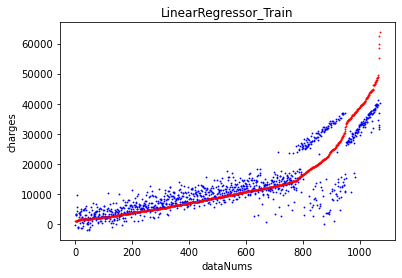

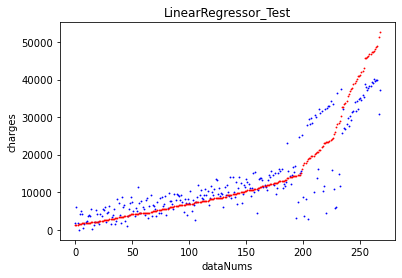

In [12]:
DrawPredict(y_train, lin_reg.predict(X_train), "LinearRegressor_Train")
DrawPredict(y_test, Linear_pred, "LinearRegressor_Test")

<h1>OLS</h1>

In [13]:
# append 1 std
X_train_std = np.append(arr=np.ones((len(X_train), 1)).astype(int), values=X_train, axis=1)
print(X_train_std[:5])

[[1 0.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 37 34.1]
 [1 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 18 34.43]
 [1 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 23 36.67]
 [1 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 32 35.2]
 [1 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 58 32.395]]


In [14]:
# try to optimize model
X_opt = X_train_std[:, [0, 4, 6, 8, 11, 12]]
X_opt = np.array(X_opt, dtype=float)
# sm.OLS()
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     597.3
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          7.88e-306
Time:                        23:45:59   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1064   BIC:                         2.174e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.173e+04   1051.856    -11.153      0.000   -1.38e+04   -9667.129
x1          2.357e+04    467.529     50.416      0.000    2.27e+04    2.45e+04
x2          1471.2160    493.112      2.984      0.003     503.633    2438.799
x3          2953.8260   1427.979      2.069      0.039     151.851    5755.801
x4           256.1202     13.466     19.020      0.000     229.698     282.542
x5           318.3000     30.639     10.389      0.000     258.180     378.420
==============================================================================
Omnibus:                      251.564   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              598.907
Skew:                           1.259   Prob(JB):                    8.89e-131
Kurtosis:                       5.664   Cond. No.                         389.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
X_train_opt = X_train[:, [3, 5, 7, 10, 11]]    # select opt's columns
X_test_opt = X_test[:, [3, 5, 7, 10, 11]]   # select opt's columns correspond train

<h1>Linear opt</h1>

In [16]:
linear_reg_opt = LinearRegression()
linear_reg_opt.fit(X_train_opt, y_train)
# than we can find the performance better than previous model's

LinearRegression()

In [17]:
Linear_pred_opt = linear_reg_opt.predict(X_test_opt)
Linear_acc_opt = linear_reg_opt.score(X_test_opt, y_test)

In [18]:
print(Linear_pred_opt[:5])
print(Linear_acc_opt)

[11199.83105446  9655.04122364 38516.55180784 16108.60647424
  7076.36602401]
0.7951974644615368


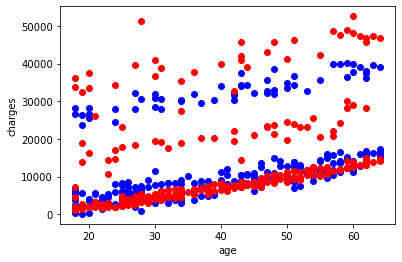

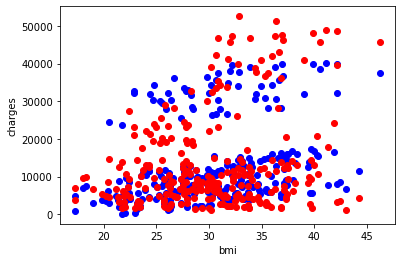

In [19]:
DrawRelationship(X_test_opt, y_test, label_x={'age': -2, 'bmi': -1}, label_y='charges', ispred=True, pred=Linear_pred_opt) 

<h1>SVR</h1>

In [20]:
svr_reg = SVR(kernel='linear')  # linear > poly > rbf in this case
svr_reg.fit(X_train, y_train)

SVR(kernel='linear')

In [21]:
Svr_pred = svr_reg.predict(X_test)
Svr_acc = svr_reg.score(X_test, y_test)

In [22]:
print(Svr_pred[5])
print(Svr_acc)

5969.595359135326
-0.08966934744948252


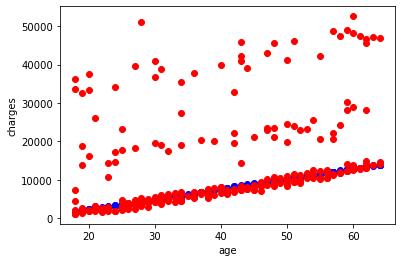

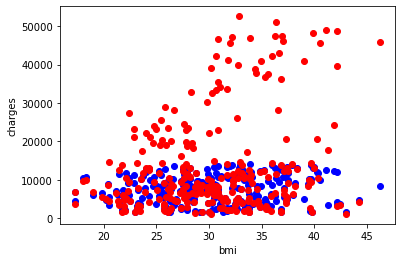

In [23]:
DrawRelationship(X_test, y_test, label_x={'age': -2, 'bmi': -1}, label_y='charges', ispred=True, pred=Svr_pred) 

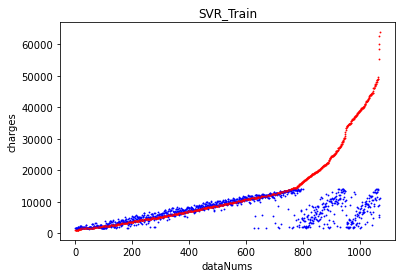

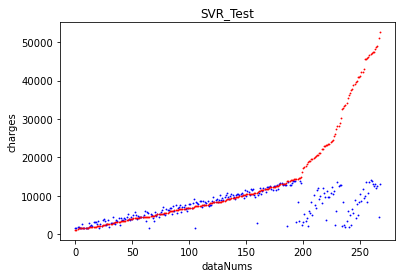

In [24]:
DrawPredict(y_train, svr_reg.predict(X_train), "SVR_Train")
DrawPredict(y_test, Svr_pred, "SVR_Test")

<h1>DecisionTreeRegressor</h1>

In [25]:
dec_reg = DecisionTreeRegressor(criterion='mse', random_state=0)
dec_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [26]:
Dec_pred = dec_reg.predict(X_test)
Dec_acc = dec_reg.score(X_test, y_test)

In [27]:
print(Dec_pred[:5])
print(Dec_acc)

[10065.413    8233.0975  44202.6536  13143.86485  9566.9909 ]
0.6870429176767843


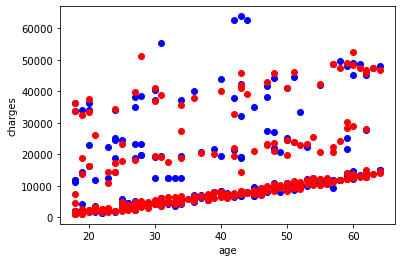

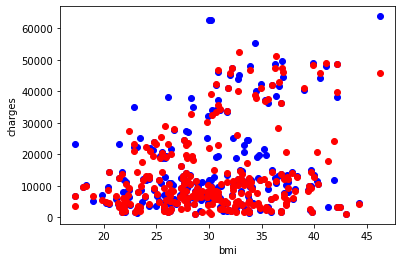

In [28]:
DrawRelationship(X_test, y_test, label_x={'age': -2, 'bmi': -1}, label_y='charges', ispred=True, pred=Dec_pred) 

<h1>mean_squared_error</h1>

In [29]:
print(np.sqrt(mean_squared_error(y_test, Linear_pred)))
print(np.sqrt(mean_squared_error(y_test, Linear_pred_opt)))
print(np.sqrt(mean_squared_error(y_test, Svr_pred)))
print(np.sqrt(mean_squared_error(y_test, Dec_pred)))

5664.665329302641
5708.784438364391
13168.107009103904
7056.971639346136


<h1>LassoCV</h1>

In [30]:
lasso_reg = LassoCV()
lasso_reg.fit(X_train, y_train)

LassoCV()

In [31]:
Lasso_pred = lasso_reg.predict(X_test)
Lasso_acc = lasso_reg.score(X_test, y_test)

In [32]:
print(Lasso_pred[:5])
print(Lasso_acc)

[11327.71944616  9603.16664907 38254.03590504 16468.29384462
  7298.40576318]
0.7953377956052091


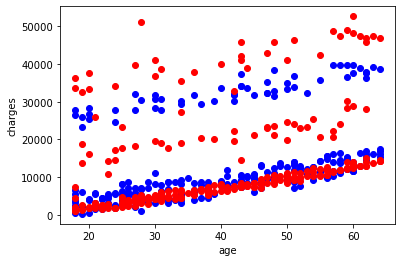

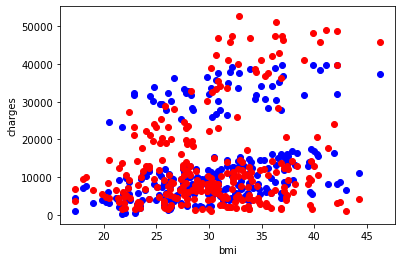

In [33]:
DrawRelationship(X_test, y_test, label_x={'age': -2, 'bmi': -1}, label_y='charges', ispred=True, pred=Lasso_pred) 

In [34]:
print(np.sqrt(mean_squared_error(y_test, Lasso_pred)))

5706.828267444733


<h1>RidgeCV</h1>

In [35]:
ridge_reg = RidgeCV()
ridge_reg.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [36]:
Ridge_pred = ridge_reg.predict(X_test)
Ridge_acc = ridge_reg.score(X_test, y_test)

In [37]:
print(Ridge_pred[:5])
print(Ridge_acc)

[11160.13215998  9477.12191969 38748.57258406 16164.46768721
  6868.18450393]
0.7979949664946049


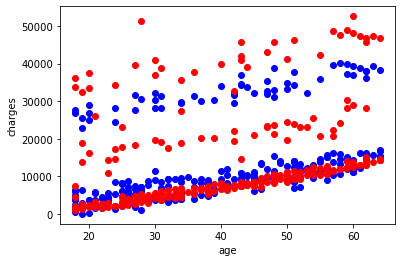

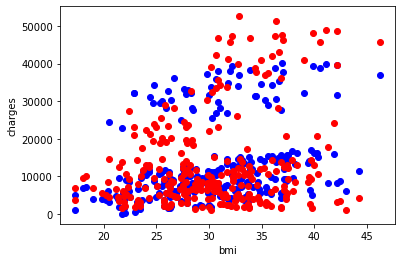

In [38]:
DrawRelationship(X_test, y_test, label_x={'age': -2, 'bmi': -1}, label_y='charges', ispred=True, pred=Ridge_pred) 

In [39]:
print(np.sqrt(mean_squared_error(y_test, Ridge_pred)))

5669.660780910376


<h1>ElasticNetCV</h1>

In [40]:
ela_reg = ElasticNetCV()
ela_reg.fit(X_train, y_train)

ElasticNetCV()

In [41]:
Ela_pred = ela_reg.predict(X_test)
Ela_acc = ela_reg.score(X_test, y_test)

In [42]:
print(Ela_pred[:5])
print(Ela_acc)

[15518.76471281 14477.55715298 16291.43670527 18333.40127975
 13659.53543927]
0.13965876219859363


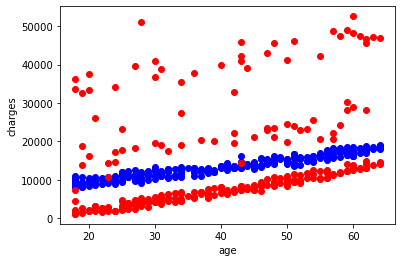

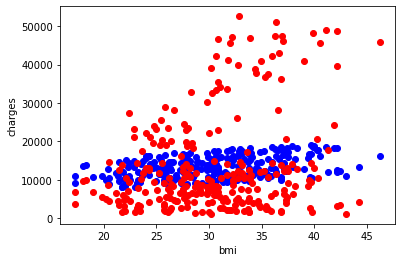

In [43]:
DrawRelationship(X_test, y_test, label_x={'age': -2, 'bmi': -1}, label_y='charges', ispred=True, pred=Ela_pred) 

In [44]:
print(np.sqrt(mean_squared_error(y_test, Ela_pred)))

11700.686678802604


<h1>RandomForestRegressor</h1>

In [45]:
rfg_reg = RandomForestRegressor()
rfg_reg.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
Rfg_pred = rfg_reg.predict(X_test)
Rfg_acc = rfg_reg.score(X_test, y_test)

In [47]:
print(Rfg_pred[:5])
print(Rfg_acc)

[10355.4080779 10493.9261646 44030.9323861 13248.8476655 10296.3185022]
0.8756395460073622


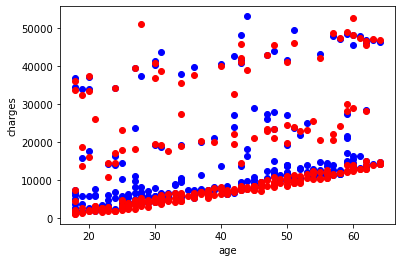

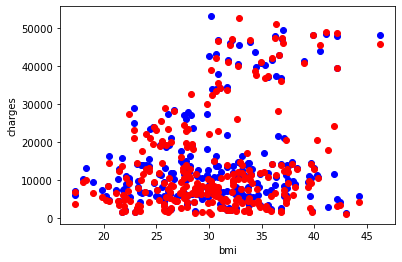

In [48]:
DrawRelationship(X_test, y_test, label_x={'age': -2, 'bmi': -1}, label_y='charges', ispred=True, pred=Rfg_pred) 

In [49]:
print(np.sqrt(mean_squared_error(y_test, Rfg_pred)))

4448.536203990128


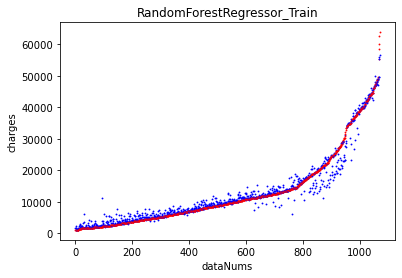

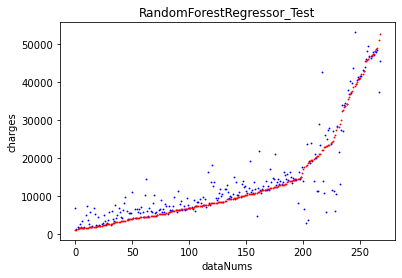

In [50]:
DrawPredict(y_train, rfg_reg.predict(X_train), "RandomForestRegressor_Train")
DrawPredict(y_test, Rfg_pred, "RandomForestRegressor_Test")

<h1>RandomForestRegressor OPT</h1>

In [51]:
rfg_reg_opt = RandomForestRegressor()
rfg_reg_opt.fit(X_train_opt, y_train)

RandomForestRegressor()

In [52]:
Rfg_pred_opt = rfg_reg_opt.predict(X_test_opt)
Rfg_acc_opt = rfg_reg_opt.score(X_test_opt, y_test)

In [53]:
print(Rfg_pred_opt[:5])
print(Rfg_acc_opt)

[11287.8719577 10805.963304  44348.5205436 14059.0253934  9366.2695275]
0.8561330229854862


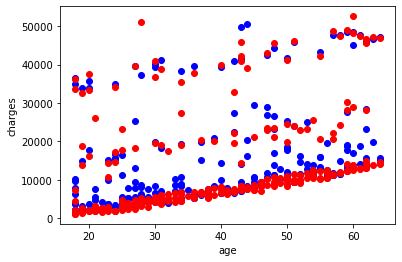

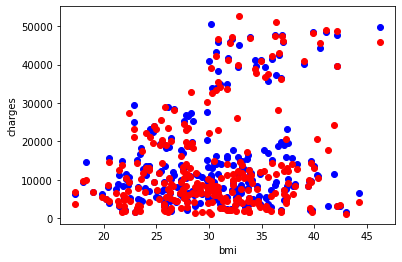

In [54]:
DrawRelationship(X_test_opt, y_test, label_x={'age': -2, 'bmi': -1}, label_y='charges', ispred=True, pred=Rfg_pred_opt) 

In [55]:
print(np.sqrt(mean_squared_error(y_test, Rfg_pred_opt)))

4784.720120520917


<h1>Grid Search</h1>

In [56]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30, 40],'max_features': [2, 4, 6, 8, 10, 12]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4, 5, 6]},
]
print(type(param_grid))

<class 'list'>


In [57]:
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 12],
                          'n_estimators': [3, 10, 30, 40]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 5, 6],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [58]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 40}

In [59]:
grid_search.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 42,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(random_state=42),
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': [{'n_estimators': [3, 10, 30, 40],
   'max_features': [2, 4, 6, 8, 10, 12]},
  {'bootstrap': [False],
   'n_estimators': [3, 10, 30],
   'max_features': [2, 3, 4, 5, 6]}],
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': True,
 'sc

In [60]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.38477674e-03, 9.92868671e-03, 7.54360566e-03, 6.16062886e-01,
       8.22168236e-03, 9.28965871e-03, 4.93742419e-03, 4.64895185e-03,
       3.96151816e-04, 9.73860191e-03, 1.43653947e-01, 1.77193627e-01])

In [61]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [62]:
final_rmse

4282.663688229567

In [63]:
final_model.score(X_test, y_test)

0.8847406987418742

<h1>Random search<\h1>

In [64]:
param_distribs = {
    'n_estimators': randint(low=1, high=300),
    'max_features': randint(low=1, high=12),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=40, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=40,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028DF26ABEE0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028DF26CFA00>},
                   random_state=42, scoring='neg_mean_squared_error')

In [65]:
rnd_search.best_params_

{'max_features': 5, 'n_estimators': 258}

In [66]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([8.26099249e-03, 9.85837848e-03, 7.22459312e-03, 6.05737671e-01,
       8.28433880e-03, 8.85443114e-03, 4.80216636e-03, 4.49725983e-03,
       6.02189545e-04, 9.82142333e-03, 1.51330748e-01, 1.80725807e-01])

In [67]:
rnd_search_model = rnd_search.best_estimator_
rnd_search_predictions = rnd_search_model.predict(X_test)

rnd_search_mse = mean_squared_error(y_test, rnd_search_predictions)
rnd_search_rmse = np.sqrt(rnd_search_mse)

In [68]:
rnd_search_model.score(X_test, y_test)

0.8906903439864108

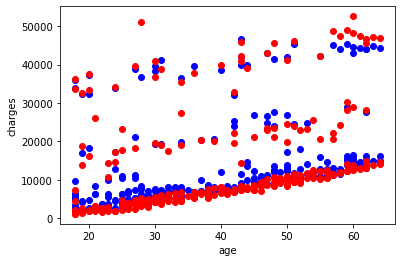

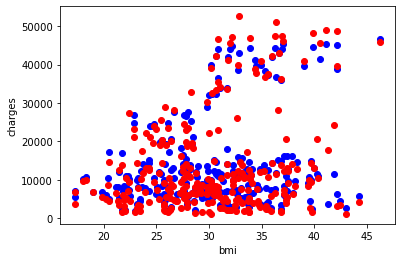

In [69]:
DrawRelationship(X_test, y_test, label_x={'age': -2, 'bmi': -1}, label_y='charges', ispred=True, pred=rnd_search_predictions) 

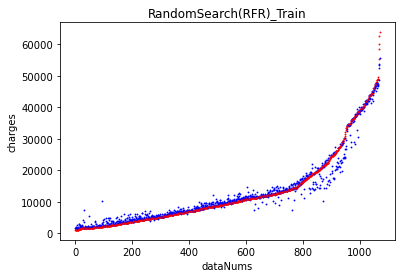

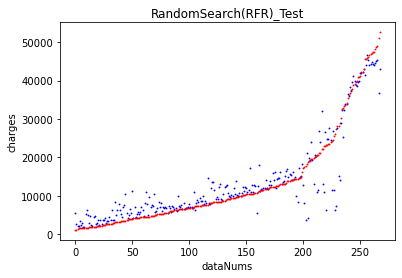

In [70]:
DrawPredict(y_train, rnd_search_model.predict(X_train), "RandomSearch(RFR)_Train")
DrawPredict(y_test, rnd_search_predictions, "RandomSearch(RFR)_Test")